<span style="font-size: 20px;">Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).</span>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml("mnist_784", as_frame=True)

In [4]:
dir(mnist)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [5]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [6]:
mnist.frame

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [7]:
X, y = mnist.data.to_numpy(), mnist.target

In [8]:
X.shape, y.shape

((70000, 784), (70000,))

In [9]:
del mnist

In [10]:
def plot_digit(digit):
    plt.imshow(digit.reshape(28, -1), cmap="binary")
    plt.axis("off")

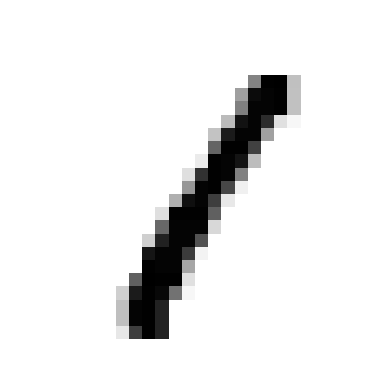

In [11]:
plot_digit(X[3])

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [13]:
X_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=60_000)

In [14]:
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
gdc = GridSearchCV(
    estimator=KNeighborsClassifier(), 
    param_grid=[dict([
         ("n_neighbors", list(range(1, 10, 1))),
         ("weights", ["uniform", "distance"])
    ])],
    cv=5,
    n_jobs=-1
)

In [17]:
gdc.fit(X_train[:10_000], y_train[:10_000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'weights': ['uniform', 'distance']}])

In [18]:
gdc.best_estimator_

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [19]:
knn = gdc.best_estimator_.fit(X_train, y_train)

In [20]:
predicted = knn.predict(x_test)

In [32]:
f"Accuracy = {(predicted == y_test).mean()*100}%"

'Accuracy = 97.66%'

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

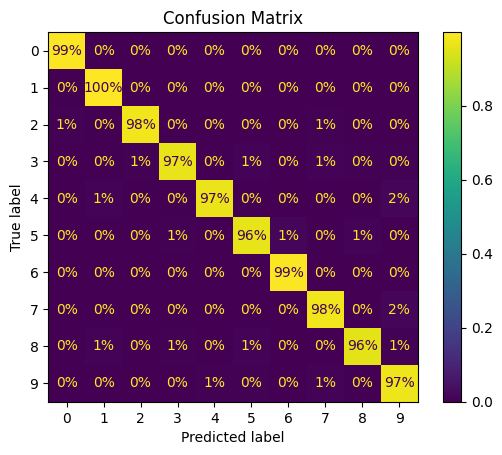

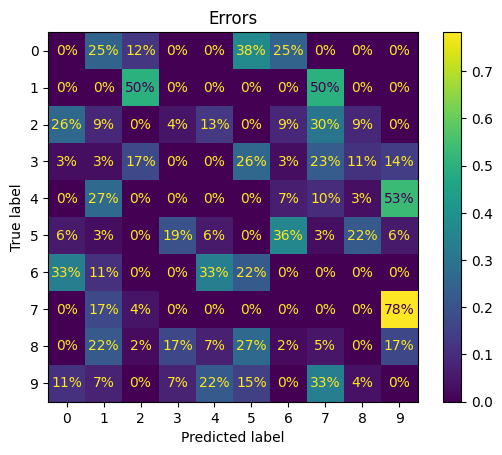

In [34]:
ConfusionMatrixDisplay.from_predictions(
    y_pred=predicted,
    y_true=y_test,
    normalize="true",
    values_format=".0%"
)
plt.title("Confusion Matrix")
plt.show()


ConfusionMatrixDisplay.from_predictions(
    y_pred=predicted,
    y_true=y_test,
    normalize="true",
    values_format=".0%",
    sample_weight=(predicted != y_test)
)
plt.title("Errors")

plt.show()

